In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Missing Values:
unique value identified for individual column

In [3]:
missing_values=['{{facility}}','{{value}}','{{ratingCriteria.name}}{{ratingCriteria.value}}']

In [4]:
data_mmt=pd.read_csv("/content/makemytrip_com-travel_sample.csv", na_values=missing_values)

In [5]:
data_mmt.shape

(20047, 33)

In [6]:
data_mmt['crawl_date']=pd.to_datetime(data_mmt['crawl_date'])
data_mmt['crawl_date'].dtype

dtype('<M8[ns]')

In [7]:
missing_df=data_mmt.isnull().sum()*100/len(data_mmt)
missing_df

area                               26.557590
city                                0.000000
country                             2.284631
crawl_date                         46.635407
highlight_value                    35.960493
hotel_overview                     16.730683
hotel_star_rating                   0.019953
image_urls                         57.100813
in_your_room                       50.835536
is_value_plus                       0.019953
latitude                            0.124707
longitude                           0.124707
mmt_holidayiq_review_count         53.050332
mmt_location_rating                42.425301
mmt_review_count                   53.234898
mmt_review_rating                  66.553599
mmt_review_score                   51.264528
mmt_traveller_type_review_count    10.176086
mmt_tripadvisor_count              44.345787
pageurl                             0.019953
property_address                    0.044894
property_id                         0.019953
property_n

#Drop columns where null values are more than 70%.

In [8]:
for column in data_mmt.columns:
  if data_mmt[column].isnull().sum()*100.0/len(data_mmt) > 70:
    data_mmt.drop(column,1, inplace=True)

In [9]:
data_mmt.shape

(20047, 29)

#Fillna for object data type

In [10]:
data_mmt['area'].fillna("Unspecified",inplace=True)

data_mmt['country'].fillna("Unspecified",inplace=True)

data_mmt['highlight_value'].fillna("Unspecified",inplace=True)

data_mmt['hotel_overview'].fillna("Unspecified",inplace=True)

label_map={'hotel_star_rating':{'0':0,'1 star':1,'1':1,'2 star':2,'2':2,'3 star':3,'3':3,'Three on 5':3,'4 star':4,'4':4,'Four star':4,'Four on 5':4,'5 star':5,'5':5,'Five on 5':5}}
data_mmt=data_mmt.replace(label_map)

data_mmt['in_your_room'].fillna('Unspecified',inplace=True)
isvalue_map={'is_value_plus':{'no':0,'yes':1}}
data_mmt=data_mmt.replace(isvalue_map)

data_mmt[['Location','mmt_loc_rating']]=data_mmt.mmt_location_rating.str.split(":",expand=True)

data_mmt['mmt_loc_rating']=pd.to_numeric(data_mmt['mmt_loc_rating'],errors='coerce')

data_mmt[['mmt_review_rating_Excellent','mmt_review_rating_VeryGood','mmt_review_rating_Average','mmt_review_rating_Poor','mmt_review_rating_Terrible']]=data_mmt.mmt_review_rating.str.split('|',expand=True)
selected_col=data_mmt[['mmt_review_rating_Excellent','mmt_review_rating_VeryGood','mmt_review_rating_Average','mmt_review_rating_Poor','mmt_review_rating_Terrible']]

for col in selected_col:
  data_mmt[col] = data_mmt[col].str.replace(r'\D+', '').astype('object')
  data_mmt[col]=pd.to_numeric(data_mmt[col],errors='coerce')

data_mmt[['mmt_traveller_type_review_count_Families','mmt_traveller_type_review_count_Couples','mmt_traveller_type_review_count_Business','mmt_traveller_type_review_count_Solo','mmt_traveller_type_review_count_Friends']]=data_mmt.mmt_traveller_type_review_count.str.split('|',expand=True)
selected_col=data_mmt[['mmt_traveller_type_review_count_Families','mmt_traveller_type_review_count_Couples','mmt_traveller_type_review_count_Business','mmt_traveller_type_review_count_Solo','mmt_traveller_type_review_count_Friends']]

for col in selected_col:
  data_mmt[col] = data_mmt[col].str.replace(r'\D+', '').astype('object')
  data_mmt[col]=pd.to_numeric(data_mmt[col],errors='coerce')

data_mmt['property_address'].fillna('Unspecified',inplace=True)

data_mmt['property_name'].fillna('Unspecified',inplace=True)

data_mmt['property_type'].fillna('Unspecified',inplace=True)

data_mmt['query_time_stamp'].fillna('Unspecified',inplace=True)

data_mmt['room_types'].fillna('Unspecified',inplace=True)

data_mmt['image_urls'].fillna('Unspecified',inplace=True)
data_mmt['pageurl'].fillna('Unspecified',inplace=True)
data_mmt['crawl_date'].fillna('Unspecified',inplace=True)
data_mmt['sitename'].fillna('Unspecified',inplace=True)

data_mmt[['traveller_rating_Location','traveller_rating_Hospitality','traveller_rating_Facilities','traveller_rating_Cleanliness','traveller_rating_Money','traveller_rating_Food']]=data_mmt.traveller_rating.str.split('|',expand=True)
selected_col=data_mmt[['traveller_rating_Location','traveller_rating_Hospitality','traveller_rating_Facilities','traveller_rating_Cleanliness','traveller_rating_Money','traveller_rating_Food']]
for col in selected_col:
  data_mmt[col]=data_mmt[col].str.replace('/5'," ").astype('object')
  data_mmt[col]=(data_mmt[col].str.findall(r'(\d*\.\d+|\d+)').apply(lambda x: pd.Series(x).astype(float)))

data_mmt['uniq_id'].fillna('Unspecified',inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [11]:
data_mmt.shape

(20047, 47)

#Delete Extra Columns


mmt_location_rating, Location , 
mmt_review_rating ,
mmt_traveller_type_count ,
traveller_rating

In [12]:
data_mmt=data_mmt.drop('mmt_location_rating',axis=1)
data_mmt=data_mmt.drop('Location',axis=1)
data_mmt=data_mmt.drop('mmt_review_rating',axis=1)
data_mmt=data_mmt.drop('mmt_traveller_type_review_count',axis=1)
data_mmt=data_mmt.drop('traveller_rating',axis=1)

In [13]:
data_mmt.shape

(20047, 42)

#Data cleaning phase 2


Drop rows where null values > 50%

In [14]:
index=data_mmt.isnull().sum(axis=1)*100/data_mmt.shape[1]
data_mmt=data_mmt.drop(index=data_mmt[index>50].index)

In [15]:
data_mmt.shape

(20022, 42)

In [16]:
data_mmt=data_mmt.reset_index(drop=True)

In [19]:
data_mmt.tail()

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,query_time_stamp,room_types,sitename,uniq_id,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
20017,"Thonichal, Mananthavady",Wayanad,India,Unspecified,Conference Hall|Doctor on Call|Room Service|Tr...,"|Abhirami Farm Resorts is a budget property, s...",1.0,//imghtlak.mmtcdn.com/images/hotels/2014121816...,Telephone | Bathroom Toiletries | Television |...,0.0,11.769778,76.001652,0.0,NaN,NaN,3.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Thonichal, Mananthavady , Thonichal, Mananthavady",201412181611103798&i=,Abhirami Farm Resorts,Hotel,2016-04-17 11:08:24 +0000,Cottage (Standard Cottage),makemytrip,f3c6e1f4c4d37a4193f6446d3421c0d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20018,Unspecified,Varanasi,India,Unspecified,24 Hour Doctor On Call.|Laundry Service (At a ...,"|Located in the Holy City of Varanasi, Hotel G...",1.0,//imghtlak.mmtcdn.com/images/hotels/2014102213...,Unspecified,0.0,25.310400,83.010200,3.0,1.0,2.9,32.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"D 8/35, Kalika Gali, Near Kashi Vishvenath Tem...",201410221340043424&i=,Golden LodgeVaranasi,Lodge,2016-04-17 11:08:24 +0000,Ac Single Room|Ac Double Room,makemytrip,51760b0acd99c150c6d64584cf029542,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,3.0,3.0,2.0,3.0
20019,"Central Mysore,Nazarbad Road",WeekendGetawaysAroundChennai,India,Unspecified,Airport/Rlwy Stn Transfer|Business Centre|Conf...,|Ginger Hotel is nestled in Mysore which is ca...,3.0,//imghtlak.mmtcdn.com/images/hotels/2007011716...,Electronic Key | Tea/Coffee Maker | Telephone ...,0.0,12.307097,76.667002,219.0,359.0,4.0,553.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Vasanth Mahal Road, Nazarbad , Mysore",200701171638057267&i=,Ginger Hotel - Mysore,Hotel,2016-04-17 11:08:24 +0000,Single|Double,makemytrip,26791dbfec7bf141a326fcc169841596,NaN,132.0,97.0,91.0,34.0,5.0,160.0,41.0,2.0,5.0,2.0,4.4,4.1,3.8,4.1,4.1,3.7
20020,Wayanad,Wayanad,India,Unspecified,Unspecified,"Homestay is situated at Korram, in Wayanad Dis...",1.0,http://www.tripvillas.com/media/origin/1049657...,Television | Linen Provided | Hot Water | Show...,0.0,11.607579,76.082773,0.0,NaN,NaN,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"Near Town Koram , Wayanad",3274006741488222&i=,Private 2 room Homestay in Kalpetta,Hotel,2016-04-17 11:08:24 +0000,Standard Room,makemytrip,6a862c717678f0e6cfcd1e3daa28e31d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20021,"Opp. APSEB Sub Station,Behind Bezwada Home Foo...",Vishakhapatnam,India,Unspecified,Conference Hall|Dining Hall|Internet Facility|...,"|4.4 km from Ramkrishna Beach, 4.2 km from Al ...",1.0,//imghtlak.mmtcdn.com/images/hotels/2011021211...,Telephone | Mineral Water | Daily Newspaper | ...,1.0,17.739367,83.307634,14.0,26.0,4.3,25.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"D.No:50-50-20/A, T.P.T Colony , Opp: APSEB Sub...",201102121107212980&i=,White Villa,Hotel,2016-04-17 11:08:24 +0000,Bollywood|Hollywood,makemytrip,e116d87dd4480e8398604e54097a6153,NaN,11.0,10.0,4.0,1.0,0.0,5.0,5.0,1.0,3.0,1.0,4.2,4.2,4.3,4.3,4.3,4.1


fillna with 0 for longitude and latitude

In [20]:
data_mmt['latitude'].fillna(0,inplace=True)
data_mmt['longitude'].fillna(0,inplace=True)

for loop to fillna-mode for remaining columns

In [21]:
nullCols=data_mmt.columns[data_mmt.isnull().sum()!=0]
for col in nullCols:
  data_mmt[col].fillna(data_mmt[col].mode()[0],inplace=True)

In [22]:
data_mmt.head()

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,query_time_stamp,room_types,sitename,uniq_id,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
0,Hardasji Ki Magri,Udaipur,India,2016-06-21 00:00:00,Unspecified,|Zion Home Stay is located in a city that sets...,1.0,Unspecified,Unspecified,0.0,24.581788,73.667805,0.0,0.0,4.5,6.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...",2.01E+17,Zion Home Stay,Hotel,2016-06-21 04:06:50 +0000,Unspecified,makemytrip,78ddf880bd7937d384ff278cc5b39d6e,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,5.0,5.0,4.0
1,Near Nai Gaon,Udaipur,India,2016-06-21 00:00:00,Unspecified,| Araliayas Resorts is a 3 star hotel located ...,3.0,Unspecified,Unspecified,0.0,24.544342,73.644242,0.0,0.0,4.5,34.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Udaipur-Jhadol Road , Near Nai Gaon",2.01E+17,Araliayas Resorts,Hotel,2016-06-21 04:06:50 +0000,Unspecified,makemytrip,9f9f9cbb2f7df8089b63d5cdeb257944,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,5.0,5.0,4.0
2,Near Bagore Ki Haveli,Udaipur,India,2016-06-21 00:00:00,Unspecified,|A 2 star property is located at 24 km from Ma...,2.0,Unspecified,Unspecified,0.0,24.579942,73.681953,0.0,0.0,0.0,16.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...",2.01E+17,Shri Udai Palace,Hotel,2016-06-21 04:06:50 +0000,Unspecified,makemytrip,b314bb7fa8bfb1ed306f517be21d729e,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,5.0,5.0,4.0
3,Dabok,Udaipur,India,2016-06-21 00:00:00,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1.0,//imghtlak.mmtcdn.com/images/hotels/2014071815...,Unspecified,0.0,24.622607,73.855194,0.0,0.0,0.0,3.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",2.01E+17,SNP House Airport Hotel And Restaurant,Hotel,2016-06-21 04:06:50 +0000,`standard,makemytrip,e6f5bb3c2d76a78d978b9ceb0e31ec56,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,5.0,5.0,4.0
4,East Udaipur,Udaipur,India,2016-06-21 00:00:00,Unspecified,| Hotel Pichola Haveli is situated in the beau...,2.0,Unspecified,Unspecified,0.0,24.580100,73.682200,0.0,0.0,3.7,139.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...",2.01E+17,Hotel Pichola Haveli (LAKE SIDE),Hotel,2016-06-21 04:06:50 +0000,Unspecified,makemytrip,63072c301427b6ca450d31eea127bcf0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,5.0,5.0,4.0


In [23]:
data_mmt.describe()

,hotel_star_rating,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
count,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000
mean,1.818200,0.036959,16.599315,59.359093,7.558685,10.167316,1.732324,48.375986,4.888518,4.381930,2.145140,2.082609,1.125961,0.431725,3.449506,2.088403,1.083758,0.364199,0.273349,4.708111,4.626151,3.910274,4.605289,4.637549,3.695790
std,1.091587,0.188667,11.452184,32.884334,38.622485,36.052386,1.989174,150.948968,0.394712,16.725083,8.325007,8.214713,4.352864,1.849788,13.018106,8.159881,5.403228,1.728374,2.360254,0.636897,0.778656,0.493475,0.774730,0.699866,0.852525
min,0.000000,0.000000,-8.744480,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,9.601743,72.559908,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000,4.500000,4.000000,4.500000,4.500000,4.000000
50%,1.000000,0.000000,17.471473,75.853202,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
75%,3.000000,0.000000,26.914340,77.617107,0.000000,3.000000,3.900000,30.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
max,5.000000,1.000000,80.162362,130.000000,1230.000000,1335.000000,5.000000,4481.000000,5.000000,535.000000,320.000000,281.000000,152.000000,54.000000,459.000000,435.000000,163.000000,57.000000,110.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [24]:
data_mmt=data_mmt.drop_duplicates()

In [25]:
data_mmt=data_mmt.reset_index(drop=True)

In [26]:
data_mmt.tail()

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,query_time_stamp,room_types,sitename,uniq_id,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
17809,"Thonichal, Mananthavady",Wayanad,India,Unspecified,Conference Hall|Doctor on Call|Room Service|Tr...,"|Abhirami Farm Resorts is a budget property, s...",1.0,//imghtlak.mmtcdn.com/images/hotels/2014121816...,Telephone | Bathroom Toiletries | Television |...,0.0,11.769778,76.001652,0.0,0.0,0.0,3.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Thonichal, Mananthavady , Thonichal, Mananthavady",201412181611103798&i=,Abhirami Farm Resorts,Hotel,2016-04-17 11:08:24 +0000,Cottage (Standard Cottage),makemytrip,f3c6e1f4c4d37a4193f6446d3421c0d4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,5.0,5.0,4.0
17810,Unspecified,Varanasi,India,Unspecified,24 Hour Doctor On Call.|Laundry Service (At a ...,"|Located in the Holy City of Varanasi, Hotel G...",1.0,//imghtlak.mmtcdn.com/images/hotels/2014102213...,Unspecified,0.0,25.310400,83.010200,3.0,1.0,2.9,32.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"D 8/35, Kalika Gali, Near Kashi Vishvenath Tem...",201410221340043424&i=,Golden LodgeVaranasi,Lodge,2016-04-17 11:08:24 +0000,Ac Single Room|Ac Double Room,makemytrip,51760b0acd99c150c6d64584cf029542,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,3.0,3.0,2.0,3.0
17811,"Central Mysore,Nazarbad Road",WeekendGetawaysAroundChennai,India,Unspecified,Airport/Rlwy Stn Transfer|Business Centre|Conf...,|Ginger Hotel is nestled in Mysore which is ca...,3.0,//imghtlak.mmtcdn.com/images/hotels/2007011716...,Electronic Key | Tea/Coffee Maker | Telephone ...,0.0,12.307097,76.667002,219.0,359.0,4.0,553.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Vasanth Mahal Road, Nazarbad , Mysore",200701171638057267&i=,Ginger Hotel - Mysore,Hotel,2016-04-17 11:08:24 +0000,Single|Double,makemytrip,26791dbfec7bf141a326fcc169841596,5.0,132.0,97.0,91.0,34.0,5.0,160.0,41.0,2.0,5.0,2.0,4.4,4.1,3.8,4.1,4.1,3.7
17812,Wayanad,Wayanad,India,Unspecified,Unspecified,"Homestay is situated at Korram, in Wayanad Dis...",1.0,http://www.tripvillas.com/media/origin/1049657...,Television | Linen Provided | Hot Water | Show...,0.0,11.607579,76.082773,0.0,0.0,0.0,1.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Near Town Koram , Wayanad",3274006741488222&i=,Private 2 room Homestay in Kalpetta,Hotel,2016-04-17 11:08:24 +0000,Standard Room,makemytrip,6a862c717678f0e6cfcd1e3daa28e31d,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,5.0,5.0,4.0
17813,"Opp. APSEB Sub Station,Behind Bezwada Home Foo...",Vishakhapatnam,India,Unspecified,Conference Hall|Dining Hall|Internet Facility|...,"|4.4 km from Ramkrishna Beach, 4.2 km from Al ...",1.0,//imghtlak.mmtcdn.com/images/hotels/2011021211...,Telephone | Mineral Water | Daily Newspaper | ...,1.0,17.739367,83.307634,14.0,26.0,4.3,25.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"D.No:50-50-20/A, T.P.T Colony , Opp: APSEB Sub...",201102121107212980&i=,White Villa,Hotel,2016-04-17 11:08:24 +0000,Bollywood|Hollywood,makemytrip,e116d87dd4480e8398604e54097a6153,5.0,11.0,10.0,4.0,1.0,0.0,5.0,5.0,1.0,3.0,1.0,4.2,4.2,4.3,4.3,4.3,4.1


In [27]:
data_mmt.shape

(17814, 42)

In [28]:
data_mmt.describe()

,hotel_star_rating,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
count,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000
mean,1.824745,0.036937,16.644552,59.363062,7.211070,10.265521,1.731144,48.860447,4.884462,4.445212,2.152689,2.091501,1.141069,0.435107,3.467273,2.129617,1.107668,0.366004,0.283934,4.706764,4.627473,3.910683,4.605019,4.638734,3.691888
std,1.093477,0.188613,11.451249,32.879378,36.565835,36.634736,1.988806,150.056469,0.400714,16.996095,8.414081,8.336064,4.458700,1.880600,13.131985,8.370973,5.504592,1.741242,2.462084,0.645020,0.778947,0.492858,0.777421,0.700845,0.854324
min,0.000000,0.000000,-8.744480,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,9.599008,72.559144,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000,4.500000,4.000000,4.500000,4.500000,4.000000
50%,1.000000,0.000000,17.533300,75.840236,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
75%,3.000000,0.000000,26.918231,77.603614,0.000000,3.000000,3.900000,31.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
max,5.000000,1.000000,80.162362,130.000000,1230.000000,1335.000000,5.000000,4481.000000,5.000000,535.000000,320.000000,281.000000,152.000000,54.000000,459.000000,435.000000,163.000000,57.000000,110.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0, 0.5, 'Frequency')

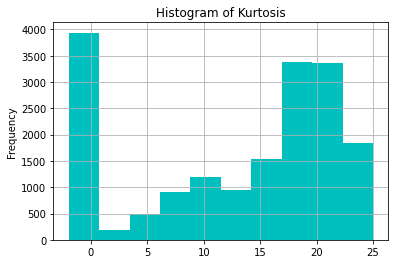

In [29]:
k=data_mmt.kurt(axis=1)
k.hist(color='c')
plt.title("Histogram of Kurtosis")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

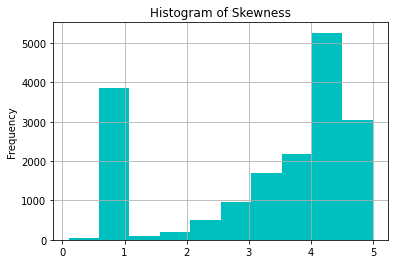

In [30]:
s=data_mmt.skew(axis=1)
s.hist(color='c')
plt.title("Histogram of Skewness")
plt.ylabel('Frequency')

In [31]:
temp=data_mmt.copy()
temp=temp.drop(['latitude','longitude','hotel_star_rating','is_value_plus'],axis=1)

In [32]:
temp.columns

Index(['area', 'city', 'country', 'crawl_date', 'highlight_value',
       'hotel_overview', 'image_urls', 'in_your_room',
       'mmt_holidayiq_review_count', 'mmt_review_count', 'mmt_review_score',
       'mmt_tripadvisor_count', 'pageurl', 'property_address', 'property_id',
       'property_name', 'property_type', 'query_time_stamp', 'room_types',
       'sitename', 'uniq_id', 'mmt_loc_rating', 'mmt_review_rating_Excellent',
       'mmt_review_rating_VeryGood', 'mmt_review_rating_Average',
       'mmt_review_rating_Poor', 'mmt_review_rating_Terrible',
       'mmt_traveller_type_review_count_Families',
       'mmt_traveller_type_review_count_Couples',
       'mmt_traveller_type_review_count_Business',
       'mmt_traveller_type_review_count_Solo',
       'mmt_traveller_type_review_count_Friends', 'traveller_rating_Location',
       'traveller_rating_Hospitality', 'traveller_rating_Facilities',
       'traveller_rating_Cleanliness', 'traveller_rating_Money',
       'traveller_rating_Fo

In [33]:
temp=temp.select_dtypes(exclude=['object'])

In [34]:
for col in temp.columns:
  if temp[col].dtype!='object' and temp[col].std()>2:
    temp[col]=np.sqrt(temp[col])

In [36]:
temp.describe()

,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
count,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000
mean,0.968040,1.430865,1.731144,4.276883,4.884462,0.874754,0.581666,0.582672,0.423177,0.435107,0.766781,0.592281,0.334553,0.366004,0.118555,4.706764,4.627473,3.910683,4.605019,4.638734,3.691888
std,2.504859,2.866811,1.988806,5.529054,0.400714,1.918391,1.347017,1.323666,0.980839,1.880600,1.696904,1.333762,0.997897,1.741242,0.519513,0.645020,0.778947,0.492858,0.777421,0.700845,0.854324
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000,4.500000,4.000000,4.500000,4.500000,4.000000
50%,0.000000,0.000000,0.000000,1.414214,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
75%,0.000000,1.732051,3.900000,5.567764,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
max,35.071356,36.537652,5.000000,66.940272,5.000000,23.130067,17.888544,16.763055,12.328828,54.000000,21.424285,20.856654,12.767145,57.000000,10.488088,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#Analysis : Measure of Dispersion

Text(0, 0.5, 'Frequency')

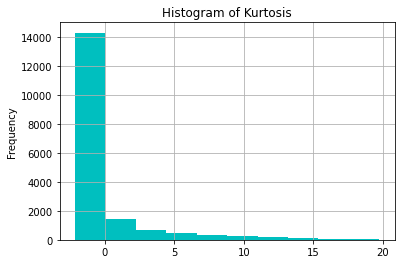

In [37]:
k=temp.kurt(axis=1)
k.hist(color='c')
plt.title("Histogram of Kurtosis")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

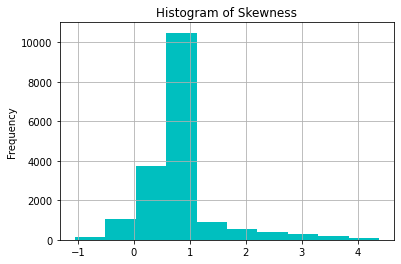

In [38]:
s=temp.skew(axis=1)
s.hist(color='c')
plt.title("Histogram of Skewness")
plt.ylabel('Frequency')

In [39]:
temp.describe()

,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
count,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000,17814.000000
mean,0.968040,1.430865,1.731144,4.276883,4.884462,0.874754,0.581666,0.582672,0.423177,0.435107,0.766781,0.592281,0.334553,0.366004,0.118555,4.706764,4.627473,3.910683,4.605019,4.638734,3.691888
std,2.504859,2.866811,1.988806,5.529054,0.400714,1.918391,1.347017,1.323666,0.980839,1.880600,1.696904,1.333762,0.997897,1.741242,0.519513,0.645020,0.778947,0.492858,0.777421,0.700845,0.854324
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000,4.500000,4.000000,4.500000,4.500000,4.000000
50%,0.000000,0.000000,0.000000,1.414214,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
75%,0.000000,1.732051,3.900000,5.567764,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
max,35.071356,36.537652,5.000000,66.940272,5.000000,23.130067,17.888544,16.763055,12.328828,54.000000,21.424285,20.856654,12.767145,57.000000,10.488088,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#Power tranformation = Box-cox

In [40]:
temp=temp.select_dtypes(exclude=['object'])

In [41]:
for col in temp.columns:
  i=temp.columns.get_loc(col)
  print(i,col)

0 mmt_holidayiq_review_count
1 mmt_review_count
2 mmt_review_score
3 mmt_tripadvisor_count
4 mmt_loc_rating
5 mmt_review_rating_Excellent
6 mmt_review_rating_VeryGood
7 mmt_review_rating_Average
8 mmt_review_rating_Poor
9 mmt_review_rating_Terrible
10 mmt_traveller_type_review_count_Families
11 mmt_traveller_type_review_count_Couples
12 mmt_traveller_type_review_count_Business
13 mmt_traveller_type_review_count_Solo
14 mmt_traveller_type_review_count_Friends
15 traveller_rating_Location
16 traveller_rating_Hospitality
17 traveller_rating_Facilities
18 traveller_rating_Cleanliness
19 traveller_rating_Money
20 traveller_rating_Food


In [42]:
colname=temp.columns

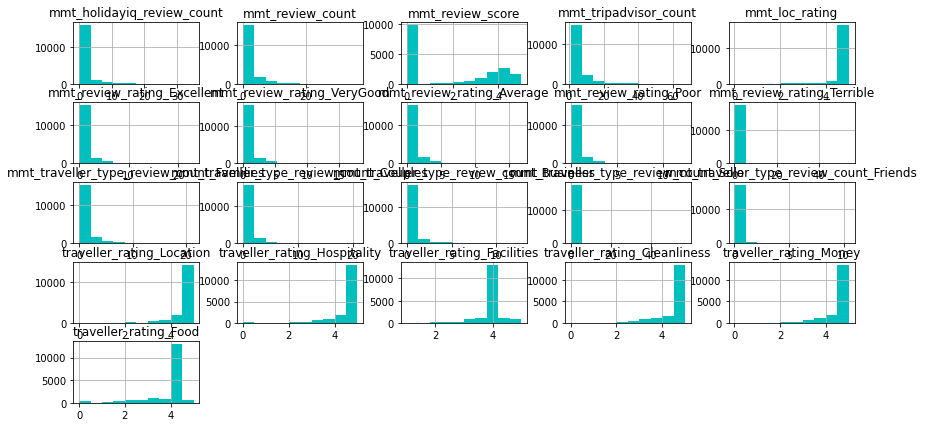

In [43]:
temp.hist(color='c',figsize=(14,7))
plt.show()

In [44]:
# perform a box-cox transform of the dataset
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
scaler = MinMaxScaler(feature_range=(1,2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
temp = pipeline.fit_transform(temp)

In [45]:
temp=pd.DataFrame(temp,columns=colname)

Text(0, 0.5, 'Frequency')

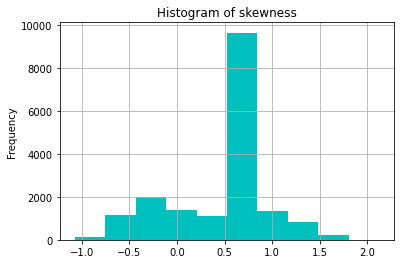

In [46]:
s=temp.skew(axis=1)
s.hist(color='c')
plt.title("Histogram of skewness")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

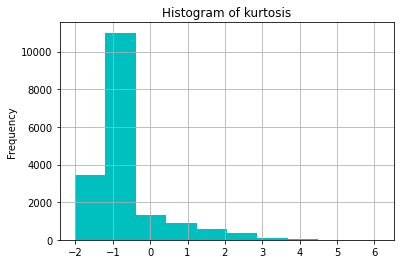

In [47]:
k=temp.kurt(axis=1)
k.hist(color='c')
plt.title("Histogram of kurtosis")
plt.ylabel('Frequency')

In [49]:
temp.shape

(17814, 21)

#Conclusion on measure of dispersion:

powertranformation is applied for normal distribution


In [50]:
old_cols=data_mmt.columns
new_cols=temp.columns
commonColumns=old_cols.intersection(new_cols)
commonColumns.shape 

(21,)

In [51]:
for col in commonColumns:
  data_mmt[col]=temp[col]

In [52]:
data_mmt.shape

(17814, 42)

In [53]:
data_mmt.describe()

,hotel_star_rating,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
count,17814.000000,17814.000000,17814.000000,17814.000000,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04
mean,1.824745,0.036937,16.644552,59.363062,1.116455e-15,1.710768e-16,-4.332325e-16,1.197432e-15,1.903290e-15,-5.641110e-16,1.365000e-15,1.269346e-15,5.937643e-16,-2.191971e-15,-4.014228e-16,-1.240279e-15,3.388380e-15,5.008531e-16,2.169790e-15,-4.095124e-16,3.035220e-15,3.480182e-16,-3.091211e-15,-1.005595e-15,-2.837644e-15
std,1.093477,0.188613,11.451249,32.879378,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,0.000000,0.000000,-8.744480,0.000000,-5.361387e-01,-6.752211e-01,-8.881000e-01,-8.670664e-01,-2.747248e+00,-6.040519e-01,-5.439161e-01,-5.555927e-01,-5.191244e-01,-4.069420e-01,-5.855277e-01,-5.561155e-01,-4.180201e-01,-3.616444e-01,-2.790566e-01,-2.046459e+00,-2.016248e+00,-3.226402e+00,-1.959700e+00,-1.938088e+00,-2.365951e+00
25%,1.000000,0.000000,9.599008,72.559144,-5.361387e-01,-6.752211e-01,-8.881000e-01,-8.670664e-01,3.800276e-01,-6.040519e-01,-5.439161e-01,-5.555927e-01,-5.191244e-01,-4.069420e-01,-5.855277e-01,-5.561155e-01,-4.180201e-01,-3.616444e-01,-2.790566e-01,-7.448351e-01,-9.860417e-01,7.019400e-02,-9.232316e-01,-1.006441e+00,2.759899e-01
50%,1.000000,0.000000,17.533300,75.840236,-5.361387e-01,-6.752211e-01,-8.881000e-01,-6.144939e-01,3.800276e-01,-6.040519e-01,-5.439161e-01,-5.555927e-01,-5.191244e-01,-4.069420e-01,-5.855277e-01,-5.561155e-01,-4.180201e-01,-3.616444e-01,-2.790566e-01,6.149916e-01,6.162571e-01,7.019400e-02,6.222900e-01,6.231970e-01,2.759899e-01
75%,3.000000,0.000000,26.918231,77.603614,-5.361387e-01,9.542248e-01,1.128427e+00,9.195921e-01,3.800276e-01,1.004523e+00,-5.439161e-01,-5.555927e-01,-5.191244e-01,-4.069420e-01,1.151100e+00,-5.561155e-01,-4.180201e-01,-3.616444e-01,-2.790566e-01,6.149916e-01,6.162571e-01,7.019400e-02,6.222900e-01,6.231970e-01,2.759899e-01
max,5.000000,1.000000,80.162362,130.000000,2.122089e+00,1.938168e+00,1.370077e+00,1.954193e+00,3.800276e-01,1.983328e+00,2.032646e+00,2.002165e+00,2.041251e+00,2.617377e+00,1.987289e+00,2.004848e+00,2.442677e+00,2.866402e+00,3.583773e+00,6.149916e-01,6.162571e-01,3.520426e+00,6.222900e-01,6.231970e-01,3.543856e+00


In [54]:
cleaned_df=data_mmt.copy()

In [55]:
cleaned_df.describe()

,hotel_star_rating,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
count,17814.000000,17814.000000,17814.000000,17814.000000,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04,1.781400e+04
mean,1.824745,0.036937,16.644552,59.363062,1.116455e-15,1.710768e-16,-4.332325e-16,1.197432e-15,1.903290e-15,-5.641110e-16,1.365000e-15,1.269346e-15,5.937643e-16,-2.191971e-15,-4.014228e-16,-1.240279e-15,3.388380e-15,5.008531e-16,2.169790e-15,-4.095124e-16,3.035220e-15,3.480182e-16,-3.091211e-15,-1.005595e-15,-2.837644e-15
std,1.093477,0.188613,11.451249,32.879378,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,0.000000,0.000000,-8.744480,0.000000,-5.361387e-01,-6.752211e-01,-8.881000e-01,-8.670664e-01,-2.747248e+00,-6.040519e-01,-5.439161e-01,-5.555927e-01,-5.191244e-01,-4.069420e-01,-5.855277e-01,-5.561155e-01,-4.180201e-01,-3.616444e-01,-2.790566e-01,-2.046459e+00,-2.016248e+00,-3.226402e+00,-1.959700e+00,-1.938088e+00,-2.365951e+00
25%,1.000000,0.000000,9.599008,72.559144,-5.361387e-01,-6.752211e-01,-8.881000e-01,-8.670664e-01,3.800276e-01,-6.040519e-01,-5.439161e-01,-5.555927e-01,-5.191244e-01,-4.069420e-01,-5.855277e-01,-5.561155e-01,-4.180201e-01,-3.616444e-01,-2.790566e-01,-7.448351e-01,-9.860417e-01,7.019400e-02,-9.232316e-01,-1.006441e+00,2.759899e-01
50%,1.000000,0.000000,17.533300,75.840236,-5.361387e-01,-6.752211e-01,-8.881000e-01,-6.144939e-01,3.800276e-01,-6.040519e-01,-5.439161e-01,-5.555927e-01,-5.191244e-01,-4.069420e-01,-5.855277e-01,-5.561155e-01,-4.180201e-01,-3.616444e-01,-2.790566e-01,6.149916e-01,6.162571e-01,7.019400e-02,6.222900e-01,6.231970e-01,2.759899e-01
75%,3.000000,0.000000,26.918231,77.603614,-5.361387e-01,9.542248e-01,1.128427e+00,9.195921e-01,3.800276e-01,1.004523e+00,-5.439161e-01,-5.555927e-01,-5.191244e-01,-4.069420e-01,1.151100e+00,-5.561155e-01,-4.180201e-01,-3.616444e-01,-2.790566e-01,6.149916e-01,6.162571e-01,7.019400e-02,6.222900e-01,6.231970e-01,2.759899e-01
max,5.000000,1.000000,80.162362,130.000000,2.122089e+00,1.938168e+00,1.370077e+00,1.954193e+00,3.800276e-01,1.983328e+00,2.032646e+00,2.002165e+00,2.041251e+00,2.617377e+00,1.987289e+00,2.004848e+00,2.442677e+00,2.866402e+00,3.583773e+00,6.149916e-01,6.162571e-01,3.520426e+00,6.222900e-01,6.231970e-01,3.543856e+00


#cleaned_df columns and indices

In [56]:
for i in cleaned_df.columns:
  print(cleaned_df.columns.get_loc(i),i)

0 area
1 city
2 country
3 crawl_date
4 highlight_value
5 hotel_overview
6 hotel_star_rating
7 image_urls
8 in_your_room
9 is_value_plus
10 latitude
11 longitude
12 mmt_holidayiq_review_count
13 mmt_review_count
14 mmt_review_score
15 mmt_tripadvisor_count
16 pageurl
17 property_address
18 property_id
19 property_name
20 property_type
21 query_time_stamp
22 room_types
23 sitename
24 uniq_id
25 mmt_loc_rating
26 mmt_review_rating_Excellent
27 mmt_review_rating_VeryGood
28 mmt_review_rating_Average
29 mmt_review_rating_Poor
30 mmt_review_rating_Terrible
31 mmt_traveller_type_review_count_Families
32 mmt_traveller_type_review_count_Couples
33 mmt_traveller_type_review_count_Business
34 mmt_traveller_type_review_count_Solo
35 mmt_traveller_type_review_count_Friends
36 traveller_rating_Location
37 traveller_rating_Hospitality
38 traveller_rating_Facilities
39 traveller_rating_Cleanliness
40 traveller_rating_Money
41 traveller_rating_Food


In [57]:
cleaned_df.isnull().sum()

area                                        0
city                                        0
country                                     0
crawl_date                                  0
highlight_value                             0
hotel_overview                              0
hotel_star_rating                           0
image_urls                                  0
in_your_room                                0
is_value_plus                               0
latitude                                    0
longitude                                   0
mmt_holidayiq_review_count                  0
mmt_review_count                            0
mmt_review_score                            0
mmt_tripadvisor_count                       0
pageurl                                     0
property_address                            0
property_id                                 0
property_name                               0
property_type                               0
query_time_stamp                  

#Feature Selection

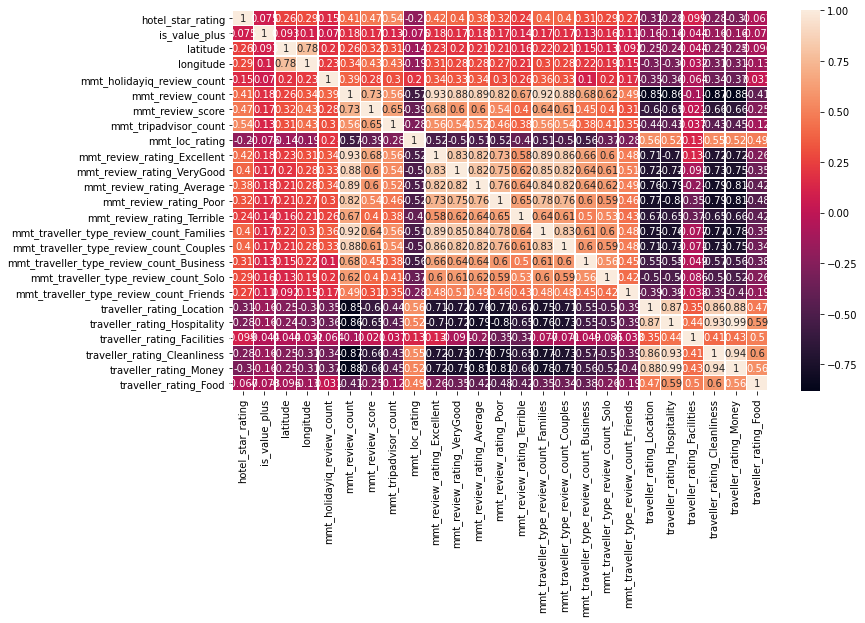

In [58]:
corr=cleaned_df.corr()
plt.figure(figsize = (12,7))
heat_map = sns.heatmap(corr, annot=True,linewidths=0.5)
plt.show()

Identify columns which are  highly correlated i.e. higher than 0.9. Ignore highly correlated columns

In [60]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = corr.columns[columns]
corr_data = corr[selected_columns]

In [61]:
corr

,hotel_star_rating,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
hotel_star_rating,1.000000,0.074940,0.255350,0.289537,0.152588,0.407252,0.470199,0.535156,-0.204185,0.419704,0.396194,0.376772,0.324993,0.242676,0.403000,0.403410,0.309288,0.287922,0.270592,-0.305338,-0.284128,0.099209,-0.278476,-0.298248,-0.066698
is_value_plus,0.074940,1.000000,0.092868,0.100263,0.069788,0.177038,0.172637,0.126729,-0.075983,0.176327,0.173595,0.176092,0.170079,0.138152,0.166363,0.173625,0.129322,0.157390,0.105146,-0.155561,-0.155247,-0.043534,-0.156577,-0.157919,-0.077701
latitude,0.255350,0.092868,1.000000,0.781857,0.198950,0.260081,0.315751,0.314386,-0.144786,0.231137,0.201334,0.210385,0.207822,0.161757,0.219553,0.207772,0.154592,0.126949,0.092017,-0.251760,-0.242231,-0.044399,-0.249890,-0.245602,-0.095897
longitude,0.289537,0.100263,0.781857,1.000000,0.231048,0.338272,0.431579,0.431276,-0.188346,0.307414,0.283281,0.284795,0.266331,0.208418,0.298726,0.280619,0.220836,0.192230,0.147085,-0.295067,-0.302150,-0.031642,-0.306398,-0.307024,-0.134831
mmt_holidayiq_review_count,0.152588,0.069788,0.198950,0.231048,1.000000,0.389880,0.275438,0.303592,0.203748,0.344302,0.332205,0.344161,0.300029,0.262554,0.355786,0.329234,0.102525,0.201183,0.166888,-0.349924,-0.363479,-0.064337,-0.341649,-0.372809,0.031107
mmt_review_count,0.407252,0.177038,0.260081,0.338272,0.389880,1.000000,0.731286,0.563430,-0.568472,0.933389,0.879694,0.886326,0.824398,0.667039,0.918263,0.881460,0.676340,0.619294,0.490937,-0.851163,-0.864001,-0.102012,-0.874347,-0.880995,-0.411974
mmt_review_score,0.470199,0.172637,0.315751,0.431579,0.275438,0.731286,1.000000,0.650330,-0.388236,0.684077,0.600740,0.601762,0.536336,0.401707,0.643022,0.611926,0.453252,0.397293,0.310778,-0.602637,-0.645523,0.020926,-0.655077,-0.655062,-0.253193
mmt_tripadvisor_count,0.535156,0.126729,0.314386,0.431276,0.303592,0.563430,0.650330,1.000000,-0.277658,0.563369,0.540285,0.519618,0.460748,0.378667,0.555604,0.539719,0.380224,0.407746,0.349173,-0.435923,-0.426988,0.036583,-0.428592,-0.447623,-0.116360
mmt_loc_rating,-0.204185,-0.075983,-0.144786,-0.188346,0.203748,-0.568472,-0.388236,-0.277658,1.000000,-0.518952,-0.496580,-0.505222,-0.517429,-0.396722,-0.513018,-0.495761,-0.559293,-0.370355,-0.280256,0.564962,0.516966,0.126452,0.546304,0.522904,0.489948
mmt_review_rating_Excellent,0.419704,0.176327,0.231137,0.307414,0.344302,0.933389,0.684077,0.563369,-0.518952,1.000000,0.825817,0.816719,0.734514,0.584642,0.886393,0.858715,0.657748,0.599463,0.483921,-0.709263,-0.701973,0.127072,-0.718757,-0.723244,-0.264324


In [63]:
corr_data.columns

Index(['hotel_star_rating', 'is_value_plus', 'latitude', 'longitude',
       'mmt_holidayiq_review_count', 'mmt_review_count', 'mmt_review_score',
       'mmt_tripadvisor_count', 'mmt_loc_rating', 'mmt_review_rating_VeryGood',
       'mmt_review_rating_Average', 'mmt_review_rating_Poor',
       'mmt_review_rating_Terrible', 'mmt_traveller_type_review_count_Couples',
       'mmt_traveller_type_review_count_Business',
       'mmt_traveller_type_review_count_Solo',
       'mmt_traveller_type_review_count_Friends', 'traveller_rating_Location',
       'traveller_rating_Hospitality', 'traveller_rating_Facilities',
       'traveller_rating_Food'],
      dtype='object')

Target Variable Hotel Star Rating 

#Conclusion #1
Top 4 correlated features with mmt_loc_rating

In [68]:
non_multicollinear1 = corr_data.corr()
print (non_multicollinear1['mmt_loc_rating'].sort_values(ascending=False)[:5])

mmt_loc_rating                  1.000000
traveller_rating_Location       0.932873
traveller_rating_Hospitality    0.923638
traveller_rating_Food           0.916882
traveller_rating_Facilities     0.645106
Name: mmt_loc_rating, dtype: float64


#Conclusion #2
Top 10 features correlated to hotel_star_rating

In [69]:
non_multicollinear2= corr_data.corr()
print (non_multicollinear2['hotel_star_rating'].sort_values(ascending=False)[:11])

hotel_star_rating                           1.000000
mmt_tripadvisor_count                       0.907424
mmt_review_score                            0.884030
mmt_review_count                            0.838761
mmt_traveller_type_review_count_Couples     0.836689
mmt_review_rating_VeryGood                  0.833362
mmt_review_rating_Average                   0.828708
mmt_review_rating_Poor                      0.814385
mmt_traveller_type_review_count_Business    0.805768
mmt_traveller_type_review_count_Solo        0.787839
mmt_review_rating_Terrible                  0.777985
Name: hotel_star_rating, dtype: float64






#Analysis #1
#Creation of Clusters based on Location,Hospitality,Facilities,Food


In [70]:
cols=[1,19,20,25,36,37,38,41]
analysis1_df=cleaned_df.iloc[:,cols]
analysis1_df.columns

Index(['city', 'property_name', 'property_type', 'mmt_loc_rating',
       'traveller_rating_Location', 'traveller_rating_Hospitality',
       'traveller_rating_Facilities', 'traveller_rating_Food'],
      dtype='object')

In [74]:
from sklearn import cluster
data = analysis1_df.drop(['property_name','city','property_type'],axis=1)
k_means = cluster.KMeans(n_clusters=5, max_iter=50, random_state=1)

In [75]:
k_means.fit(data) 
labels = k_means.labels_

In [76]:
k_means.predict(data)

array([0, 0, 0, ..., 4, 0, 4], dtype=int32)

In [77]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data, k_means.labels_, metric='euclidean')
score

0.7636688027068027

In [79]:
col1=analysis1_df['city']
col2=analysis1_df['property_type']
col3=analysis1_df['traveller_rating_Location']
col4=analysis1_df['traveller_rating_Hospitality']
col5=analysis1_df['traveller_rating_Facilities']
col6=analysis1_df['traveller_rating_Food']
combine_columns=zip(col1,col2,col3,col4,col5,col6,labels)

In [80]:
cluster_analysis=pd.DataFrame(combine_columns, index=analysis1_df['property_name'], columns=['city','property_type','location','Hospitality','facilities','food','ClusterID'])
cluster_analysis.tail(n=300)

,city,property_type,location,Hospitality,facilities,food,ClusterID
property_name,,,,,,,
Villa Brook Homestay in Kerala,Allepey,Hotel,0.614992,0.616257,0.070194,0.275990,0
Hotel Mayura Vijayanagara TB Dam - KSTDC,Hampi,Hotel,0.614992,0.616257,3.520426,3.543856,1
Tourist Complex,Bharatpur,Hotel,-2.032352,-1.633034,-1.551954,0.275990,3
Khatana Residency,Bhiwadi,Hotel,0.614992,0.616257,0.070194,0.275990,0
Hotel Prakash,Ludhiana,Hotel,0.614992,0.616257,0.070194,0.275990,0
...,...,...,...,...,...,...,...
Abhirami Farm Resorts,Wayanad,Hotel,0.614992,0.616257,0.070194,0.275990,0
Golden LodgeVaranasi,Varanasi,Lodge,-1.822268,-2.012391,-1.842362,-1.302412,3
Ginger Hotel - Mysore,WeekendGetawaysAroundChennai,Hotel,-1.424026,-1.547201,-0.413752,-0.329755,4


In [81]:
cluster_analysis.shape

(17814, 7)

In [82]:
from sklearn import cluster
centroids = k_means.cluster_centers_
centroid_df=pd.DataFrame(centroids,columns=data.columns)
centroid_df

,mmt_loc_rating,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Food
0,0.375989,0.612114,0.606226,0.104324,0.243941
1,0.118674,-0.193203,0.188143,2.653195,2.606353
2,-2.622662,-1.467638,-1.399357,-0.381944,-1.427446
3,0.378925,-1.523423,-1.837658,-1.708771,-1.340236
4,0.331119,-1.289893,-1.190640,0.262010,0.298429


In [83]:
cluster_analysis.value_counts()

city            property_type  location   Hospitality  facilities  food       ClusterID
NewDelhiAndNCR  Hotel           0.614992   0.616257     0.070194    0.275990  0            757
Goa             Hotel           0.614992   0.616257     0.070194    0.275990  0            492
Mumbai          Hotel           0.614992   0.616257     0.070194    0.275990  0            331
Jaipur          Hotel           0.614992   0.616257     0.070194    0.275990  0            323
Bangalore       Hotel           0.614992   0.616257     0.070194    0.275990  0            305
                                                                                          ... 
Mangalore       Hotel          -0.390366  -1.810119    -1.391438   -1.655021  3              1
                                          -0.768570     1.226232    1.630069  4              1
Thalasserry     Hotel          -1.822268   0.616257     0.070194   -2.365951  2              1
Mangalore       Hotel           0.614992   0.616257     3

In [84]:
centroid_average=centroid_df.iloc[:, :].mean(axis=1)
centroid_average=centroid_df.iloc[:, :].mean(axis=1)
centroid_average

0    0.388519
1    1.074632
2   -1.459810
3   -1.206232
4   -0.317795
dtype: float64

#Conclusion:


1.   0 cluster = 4 star
2.   1 cluster = 5 star
3.   2 cluster = 1 star
4.   3 cluster = 2 star
5.   4 cluster = 3 star



#Hotel Star Rating Prediction


In [85]:
col='ClusterID'
conditions=[cluster_analysis[col]==0,cluster_analysis[col]==1,cluster_analysis[col]==2,cluster_analysis[col]==3,cluster_analysis[col]==4]
choices=[4,5,1,2,3]
cluster_analysis['Hotel_Star_Ratings']=np.select(conditions,choices)

In [86]:
cluster_analysis.tail()

,city,property_type,location,Hospitality,facilities,food,ClusterID,Hotel_Star_Ratings
property_name,,,,,,,,
Abhirami Farm Resorts,Wayanad,Hotel,0.614992,0.616257,0.070194,0.275990,0,4
Golden LodgeVaranasi,Varanasi,Lodge,-1.822268,-2.012391,-1.842362,-1.302412,3,2
Ginger Hotel - Mysore,WeekendGetawaysAroundChennai,Hotel,-1.424026,-1.547201,-0.413752,-0.329755,4,3
Private 2 room Homestay in Kalpetta,Wayanad,Hotel,0.614992,0.616257,0.070194,0.275990,0,4
White Villa,Vishakhapatnam,Hotel,-1.670824,-1.443411,0.911930,0.509524,4,3


#Recommendation Model _ City and Rating wise
Based on clustering : hotel star prediction and recommendation 

In [87]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

def hotel_star_prediction(city,star):
  user_choice=cluster_analysis.loc[(cluster_analysis.city==city) & (cluster_analysis['Hotel_Star_Ratings']==star)].sort_values(by='Hotel_Star_Ratings',ascending=False)
  user_choice_pvt=user_choice.pivot_table(index=['city','property_name'],columns='property_type',values='Hotel_Star_Ratings').fillna(0)
  user_choice_matrix = csr_matrix(user_choice_pvt.values)
  d=user_choice_pvt.index.shape[0]
  if d<6:
    val=d
  else:
    val=6
  model_knn = NearestNeighbors(metric = 'cosine')
  model_knn.fit(user_choice_matrix)

  query_index = np.random.choice(user_choice_pvt.shape[0])
  distances, indices = model_knn.kneighbors(user_choice_pvt.iloc[query_index,:].values.reshape(1, -1), n_neighbors = val)
  
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_choice_pvt.index[query_index]))
    else:
        print('{0} : {1}'.format(i, user_choice_pvt.index[indices.flatten()[i]]))
  


In [91]:
hotel_star_prediction('Munnar',3)

Recommendations for ('Munnar', 'Tea Castle Resort'):

1 : ('Munnar', 'Tea Valley Resort')
2 : ('Munnar', 'Spice Country Resort')
3 : ('Munnar', 'Tea County')
4 : ('Munnar', 'Nature Zone Resorts')
5 : ('Munnar', 'Swiss County')


In [92]:
cluster_analysis.loc[(cluster_analysis.Hotel_Star_Ratings==3)&(cluster_analysis.city=='Munnar')]

,city,property_type,location,Hospitality,facilities,food,ClusterID,Hotel_Star_Ratings
property_name,,,,,,,,
Tea County,Munnar,Hotel,-1.025984,-0.768570,0.614977,0.058921,4,3
Tea Valley Resort,Munnar,Hotel,-1.670824,-1.318164,-0.413752,-0.142679,4,3
Swiss County,Munnar,Hotel,-1.248441,-0.986042,0.614977,0.275990,4,3
Seven Springs Plantation Resort,Munnar,Hotel,-1.025984,-0.986042,-0.179045,1.030227,4,3
Tea Castle Resort,Munnar,Hotel,-1.822268,-0.986042,0.070194,-0.329755,4,3
Falling Waters,Munnar,Hotel,-1.424026,-1.167330,-0.179045,0.509524,4,3
Issacs Residency,Munnar,Hotel,-1.424026,-0.986042,0.070194,0.275990,4,3
Swiss County,Munnar,Hotel,-1.248441,-0.986042,0.614977,0.275990,4,3
Birds Valley Resorts,Munnar,Hotel,-1.562266,-1.318164,0.070194,-0.503204,4,3


#verify output by comaparing index value

In [93]:
cluster_analysis.loc[(cluster_analysis.index.values=='Misty Mountain Resort') | (cluster_analysis.index.values=='Tea County')|(cluster_analysis.index.values=='Spice Country Resort')]

,city,property_type,location,Hospitality,facilities,food,ClusterID,Hotel_Star_Ratings
property_name,,,,,,,,
Tea County,Munnar,Hotel,-1.025984,-0.76857,0.614977,0.058921,4,3
Spice Country Resort,Munnar,Hotel,-1.424026,-1.16733,0.070194,0.275990,4,3
Misty Mountain Resort,Munnar,Hotel,-1.025984,-1.16733,0.334637,0.509524,4,3
Spice Country Resort,Munnar,Hotel,-1.248441,-1.16733,-0.179045,-0.663877,2,1


#Recommendation Model _ City wise

In [94]:
cols=[0,1,6,19,20,14]
recommend=cleaned_df.iloc[:,cols]
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

def hotel_recommendation(city):
  user_choice=recommend.loc[(recommend.city==city)].sort_values(by='hotel_star_rating',ascending=False)
  user_choice_pvt=user_choice.pivot_table(index=['hotel_star_rating','property_name'],columns='property_type',values='mmt_review_score').fillna(0)
  user_choice_matrix = csr_matrix(user_choice_pvt.values)
  d=user_choice_pvt.index.shape[0]
  if d<6:
    val=d
  else:
    val=6

  model_knn = NearestNeighbors(metric = 'cosine')
  model_knn.fit(user_choice_matrix)

  query_index = np.random.choice(user_choice_pvt.shape[0])
  distances, indices = model_knn.kneighbors(user_choice_pvt.iloc[query_index,:].values.reshape(1, -1), n_neighbors = val)
  
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_choice_pvt.index[query_index]))
    else:
        print(user_choice_pvt.index[indices.flatten()[i]])


In [95]:
hotel_recommendation('Jaipur')

Recommendations for (1.0, 'Sanjay Hotel'):

(1.0, 'Khandela Paying Guest House')
(2.0, 'Jag Niwas A Heritage Home Stay')
(1.0, 'Lichana Haveli')
(1.0, 'Kriss Residency')
(1.0, 'Nahar Singh Haveli')


In [96]:
cleaned_df.loc[(cleaned_df.city=='Jaipur')&(cleaned_df.property_name=='Khandela Paying Guest House')] 

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,query_time_stamp,room_types,sitename,uniq_id,mmt_loc_rating,mmt_review_rating_Excellent,mmt_review_rating_VeryGood,mmt_review_rating_Average,mmt_review_rating_Poor,mmt_review_rating_Terrible,mmt_traveller_type_review_count_Families,mmt_traveller_type_review_count_Couples,mmt_traveller_type_review_count_Business,mmt_traveller_type_review_count_Solo,mmt_traveller_type_review_count_Friends,traveller_rating_Location,traveller_rating_Hospitality,traveller_rating_Facilities,traveller_rating_Cleanliness,traveller_rating_Money,traveller_rating_Food
8692,BANI PARK JAIPUR,Jaipur,India,2016-05-29 00:00:00,Unspecified,|less,1.0,Unspecified,Unspecified,0.0,0.0,0.0,-0.536139,-0.675221,-0.8881,-0.867066,http://hotelz.makemytrip.com/makemytrip/site/h...,"B -20,NEAR SHIV MARG , BANI PARK JAIPUR",2.02E+17,Khandela Paying Guest House,Hotel,2016-05-29 04:08:03 +0000,Unspecified,makemytrip,397ebc614735c83cca84095d71cd3fdc,0.380028,-0.604052,-0.543916,-0.555593,-0.519124,-0.406942,-0.585528,-0.556116,-0.41802,-0.361644,-0.279057,0.614992,0.616257,0.070194,0.62229,0.623197,0.27599


#Recommendation Model _ City and Rating wise
hotel_star_rating given in dataset

In [97]:
cols=[0,1,6,19,20,14]
recommend=cleaned_df.iloc[:,cols]
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

def hotel_star_recommendation(city,star):
  user_choice=recommend.loc[(recommend.city==city) & (recommend['hotel_star_rating']==star)].sort_values(by='hotel_star_rating',ascending=False)
  user_choice_pvt=user_choice.pivot_table(index=['city','property_name'],columns='property_type',values='hotel_star_rating').fillna(0)
  user_choice_matrix = csr_matrix(user_choice_pvt.values)
  d=user_choice_pvt.index.shape[0]
  if d<6:
    val=d
  else:
    val=6
  model_knn = NearestNeighbors(metric = 'cosine')
  model_knn.fit(user_choice_matrix)

  query_index = np.random.choice(user_choice_pvt.shape[0])
  distances, indices = model_knn.kneighbors(user_choice_pvt.iloc[query_index,:].values.reshape(1, -1), n_neighbors = val)
  
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_choice_pvt.index[query_index]))
    else:
        print('{0} : {1}'.format(i, user_choice_pvt.index[indices.flatten()[i]]))

In [98]:
hotel_star_recommendation('Indore',2)

Recommendations for ('Indore', 'Hotel Signature'):

1 : ('Indore', 'Hotel Silver Shed')
2 : ('Indore', 'Monarch Hotel')
3 : ('Indore', 'MALWA COUNTRY')
4 : ('Indore', 'Balwas International')
5 : ('Indore', 'Hotel Signature')


#Recommendationi Model _ Related Search


In [99]:
cols=[0,1,6,19,20,14]
recommend=cleaned_df.iloc[:,cols]

def property_type_Recommendation(city,property_type):
  user_choice=recommend.loc[(recommend.city==city)&(recommend.property_type!='Unspecified')].sort_values(by='hotel_star_rating',ascending=False)
  user_choice_pvt=user_choice.pivot_table(index=['hotel_star_rating','property_name'],columns='property_type',values='mmt_review_score').fillna(0)
  selected_rating=user_choice_pvt[property_type] 
  selected_rating=selected_rating.sort_values(ascending=False)
  sr=pd.DataFrame(selected_rating)
  print(sr.head())
  similarto=user_choice_pvt.corrwith(selected_rating)

  corr_=pd.DataFrame(similarto,columns=['Correlation'])
  corr_.dropna(inplace=True)
  corr_.sort_values(by='Correlation' ,ascending=False)
  print("*"*80)
  print("Related Search:")
  for i in corr_.index:
    print(i)

In [100]:
property_type_Recommendation('Jaipur','Hotel')

                                            Hotel
hotel_star_rating property_name                  
2.0               Hotel Harsh Paradise   1.370077
1.0               Hotel Mother India     1.370077
3.0               Om Palace - Janakpuri  1.370077
1.0               Hotel Apple 9          1.370077
3.0               Aapno Heritage Jaipur  1.370077
********************************************************************************
Related Search:
Homestay
Hotel
Lodge
Palace


City Wise rating Property_name, Property_type

In [101]:
user_choice=recommend.loc[(recommend.city=='Agra')].sort_values(by='hotel_star_rating',ascending=False)

In [102]:
user_choice.head()

,area,city,hotel_star_rating,property_name,property_type,mmt_review_score
283,The Agra Fort,Agra,5.0,The Oberoi Amarvilas,Hotel,1.331016
12761,"East Gate Road,Fatehabad Road,East Agra",Agra,5.0,Radisson Blu Agra Taj East Gate,Hotel,1.268655
10644,Fatehabad Road,Agra,5.0,Ramada Plaza,Hotel,1.350786
10789,Fatehabad Road,Agra,5.0,Crystal Sarovar Premiere,Hotel,1.289969
287,Unspecified,Agra,5.0,Courtyard by Marriott Agra,Hotel,1.310749


In [103]:
user_choice_pvt=user_choice.pivot_table(index=['hotel_star_rating','property_name'],columns='property_type',values='mmt_review_score').fillna(0)
user_choice_pvt.sort_values(by='hotel_star_rating',ascending=False)

property_type                                      Homestay     Hotel  Lodge
hotel_star_rating property_name                                             
5.0               The Oberoi Amarvilas             0.000000  1.331016    0.0
                  Ramada Plaza                     0.000000  1.350786    0.0
                  Radisson Blu Agra Taj East Gate  0.000000  1.268655    0.0
                  Hotel Mansingh Palace            0.000000  1.177670    0.0
                  Crystal Sarovar Premiere         0.000000  1.289969    0.0
...                                                     ...       ...    ...
1.0               Hotel Seva                       0.000000 -0.888100    0.0
                  Hotel Sai President              0.000000  0.571007    0.0
                  Hotel Sagar                      0.000000 -0.888100    0.0
                  Hotel Raj Paradise               0.000000  0.992729    0.0
                  Awtar Mansion                    1.370077  0.000000    0.0

[95 rows x 3 columns]

#Visualization of count of ratings based on cities

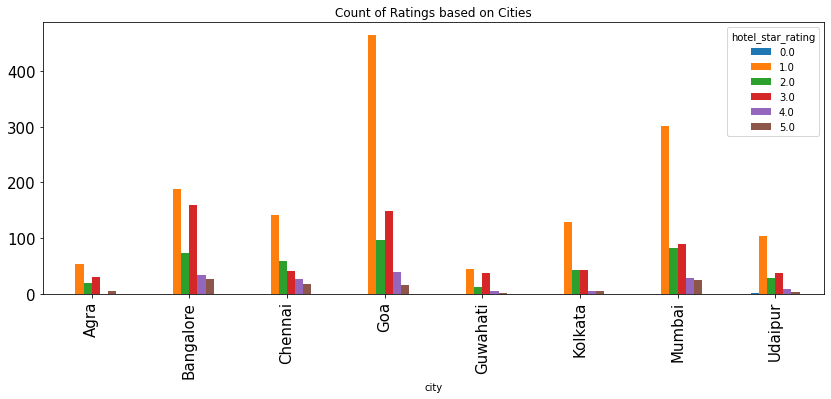

In [104]:
cities = ['Kolkata','Goa','Guwahati','Mumbai','Udaipur','Bangalore','Agra','Chennai']
city_df = recommend.loc[recommend['city'].isin(cities)]
city_plot= pd.crosstab(index=city_df['city'],columns=city_df['hotel_star_rating'])
plt = city_plot.plot(kind='bar',figsize=(14,5),title='Count of Ratings based on Cities',fontsize=15)
plt

#Conclusion:
This analysis recommends traveller to choose hotels and other property types that matches their requirements and interests.




#Analysis #2
#KNN classification

hotel_star_rating as target variable

In [105]:
cols=[6,15,14,13,32,27,28,29,33,34,30]
classify_df=cleaned_df.iloc[:,cols]
classify_df.columns

Index(['hotel_star_rating', 'mmt_tripadvisor_count', 'mmt_review_score',
       'mmt_review_count', 'mmt_traveller_type_review_count_Couples',
       'mmt_review_rating_VeryGood', 'mmt_review_rating_Average',
       'mmt_review_rating_Poor', 'mmt_traveller_type_review_count_Business',
       'mmt_traveller_type_review_count_Solo', 'mmt_review_rating_Terrible'],
      dtype='object')

In [106]:
xcol=[1,2,3,4,5]
X = classify_df.iloc[:,xcol].values
y = classify_df.iloc[:, 0].values

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [117]:
y_pred = classifier.predict(X_test)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[   0    9    0    2    0    0]
 [   0 1852   79   95   12    0]
 [   1  313   81   87   13    4]
 [   0  354   91  240   42   15]
 [   2   48   20   70   38   12]
 [   0   17    8   17   13   28]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.71      0.91      0.80      2038
         2.0       0.29      0.16      0.21       499
         3.0       0.47      0.32      0.38       742
         4.0       0.32      0.20      0.25       190
         5.0       0.47      0.34      0.39        83

    accuracy                           0.63      3563
   macro avg       0.38      0.32      0.34      3563
weighted avg       0.58      0.63      0.59      3563

Accuracy: 0.6284030311535224


#Conclusion:
Accuracy:62.19%


#Cross-validation

In [122]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

In [124]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    # 1. KNeighborsClassifier with k neighbours
    classifier = KNeighborsClassifier(n_neighbors=k)
    # 2. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
    # 3. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())



In [125]:
print(k_scores)
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))
print(cross_val_score(classifier, X, y, cv=10, scoring='accuracy').mean())

[0.6083412892415325, 0.616312605120391, 0.6143473540067214, 0.6158058846623324, 0.6217009448153, 0.6233284873187549, 0.620971332893474, 0.6238899696320621, 0.6233287393871336, 0.624170931348547, 0.6263601452165929, 0.6270336404156356, 0.6292229173007762, 0.6283804417624369, 0.6293906057896326, 0.6305700652415981, 0.6299518045260137, 0.6310746116098913, 0.6301206588311212, 0.6321976392536003, 0.6328157109179007, 0.633713389431151, 0.6325910864840305, 0.6338817395995011, 0.6328151122555015, 0.6338816765824065, 0.6325906138558206, 0.6321414595137222, 0.633320351811836, 0.6342745251504376]
Length of list 30
Max of list 0.6342745251504376
0.6342745251504376


Text(0, 0.5, 'Cross-Validated Accuracy')

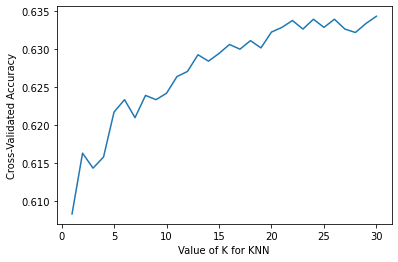

In [126]:
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#Conclusion

*   cv=10
*   k_neighbor = 30
*   Accuracy = 63.42%







#Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [128]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

In [129]:
ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))

Accuracy is:  0.6511366825708672


#Conclusion
Accuracy = 65.11%

#Gradient Boost

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=4, max_depth=10, random_state=0)
    gb_clf.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.765
Accuracy score (testing): 0.653
Learning rate:  0.075
Accuracy score (training): 0.786
Accuracy score (testing): 0.651
Learning rate:  0.1
Accuracy score (training): 0.801
Accuracy score (testing): 0.655
Learning rate:  0.25
Accuracy score (training): 0.841
Accuracy score (testing): 0.647
Learning rate:  0.5
Accuracy score (training): 0.846
Accuracy score (testing): 0.644
Learning rate:  0.75
Accuracy score (training): 0.846
Accuracy score (testing): 0.639
Learning rate:  1
Accuracy score (training): 0.692
Accuracy score (testing): 0.584


#Conclusion:
Accuracy after applying Cross-validation = 65.3%

#Nearby location recommendation :
Function #4 Find hotel location wise

In [131]:
pip install geopy

In [132]:
from geopy.geocoders import Nominatim 
  
def find_loc(loc):
 geolocator = Nominatim(user_agent="MMT_review_project") 
 location = geolocator.geocode(loc) 
 return [location.latitude, location.longitude]

In [133]:
from geopy.distance import geodesic

def nearby_location(loc,n):
  loct=find_loc(loc)
  lt1=loct[0]
  lg1=loct[1]
 
  cols=[0,1,10,11,19]
  recommend=cleaned_df.iloc[:,cols]
 
  distance=[]
  result=[]
  recommended_locs=pd.DataFrame()
  
  for i in range(0,recommend.shape[0]):
    l2=recommend.loc[i,['property_name','latitude','longitude']]    
    place=l2[0]
    lt2=l2[1]
    lg2=l2[2]
    
    dis=geodesic((lt1,lg1),(lt2,lg2)).kilometers
    if dis<n:
      distance.append(dis)  
      result.append(place)
  comb=zip(result,distance)
  recommended_locs=pd.DataFrame(comb,columns=['Place','Distance(km)'])
  return recommended_locs

In [134]:
places=nearby_location('mall road manali',3)

In [135]:
places.head(10)

,Place,Distance(km)
0,New Adarsh Annexe,0.104773
1,Snow Line,0.599175
2,Hotel Holiday Home,0.861653
3,Hotel Himgiri,0.171661
4,Hotel Chandertal,1.356045
5,Apple Nest Manali,2.189537
6,"The Holiday Resorts & Cottages, Manali",0.850474
7,Hotel Vikrant Inn,0.221402
8,Hotel Himalayan Villa,0.678671
9,Hotel Triveni,0.715709


#Recommendation Functions Call

In [ ]:
hotel_star_prediction('Munnar',3)

Recommendations for ('Munnar', 'Vedanta Wake Up - Devikulam'):

1 : ('Munnar', 'Tea Valley Resort')
2 : ('Munnar', 'Spice Country Resort')
3 : ('Munnar', 'Tea County')
4 : ('Munnar', 'Nature Zone Resorts')
5 : ('Munnar', 'Swiss County')


In [ ]:
hotel_recommendation('Agra')

Recommendations for (1.0, 'Hotel Pentas'):

(2.0, 'Aicon Palace')
(1.0, 'Supreme Guest House')
(1.0, 'agra guest house b')
(1.0, 'Shraddha Homestay')
(1.0, 'Taj Heights')


In [ ]:
hotel_star_recommendation('Indore',2)

Recommendations for ('Indore', 'Balwas International'):

1 : ('Indore', 'Hotel Silver Shed')
2 : ('Indore', 'Monarch Hotel')
3 : ('Indore', 'MALWA COUNTRY')
4 : ('Indore', 'Balwas International')
5 : ('Indore', 'Hotel Signature')


In [ ]:
#drop down city list
#CORRELATION
property_type_Recommendation('Goa','Hotel')

                                               Hotel
hotel_star_rating property_name                     
3.0               Shining Sand Beach Hotel  1.370077
1.0               SOL BESO                  1.370077
                  Majhi resort              1.370077
3.0               The Mandala Goa           1.370077
                  Tiara Camelot Baga        1.370077
********************************************************************************
Related Search:
Apartment
Beach Hut
Cottage
Guest House
Homestay
Hostel
Hotel
Resort
Unspecified
Villa


In [ ]:
nearby_location('Agra',4)

                      property_name  longitude   latitude
283            The Oberoi Amarvilas  78.048928  27.167792
298                   Awtar Mansion  78.001229  27.158808
333                 Hotel Alleviate  78.025003  27.190005
2836              Hotel Sham Palace  78.010000  27.190000
5742               Hotel River Bank  78.018200  27.182600
6486               Amar Yatri Niwas  78.035011  27.161224
6487              Hotel Moti Palace  78.005676  27.179714
6514               Hotel Taj Resort  78.047931  27.170152
7321            Blue Sapphire Hotel  78.006000  27.198700
7337             Hotel Shyam Palace  78.009998  27.190001
7347             Hotel Mumtaz Villa  78.046192  27.171354
7357              Hotel Riya Palace  77.999752  27.166663
7371                    Hotel Gopal  78.038420  27.164561
7383                Hotel Love Kush  78.045235  27.158328
8477                   Hotel Safari  78.034387  27.154159
8739                  Hotel Samovar  78.043044  27.159795
8741          